In [1]:
import pandas as pd

f = open('../data/영화 기생충_review.txt','r')
review = f.read()

In [2]:
review = pd.Series(review.split('\n'))
review

0                                별1개  준 사람들은   나베당임
1                                                역쉬
2            영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..
3       지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!
4                              대단한 영화. 몰입력 장난아님. 후아
                           ...                     
1786                            와 내 앞으로도 4명이나 있네 ;;
1787                          좌파폭도고발영화.전라도까는 내용이었어.
1788                          언제나 기대되는 봉준호감독의 영화!!!
1789                            이번에도 매우 매우 기대됩니다!!!
1790                                               
Length: 1791, dtype: object

1. '영화 기생충_review.txt' 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오. 그리고 '영화 기생충_review.txt'을 사전에 등록하시오.

In [3]:
import re
import konlpy

review = review.map(lambda x: re.sub(r'\d', " ", x))
review = review.map(lambda x: re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', ' ', x))
review

0                                별 개  준 사람들은   나베당임
1                                                역쉬
2            영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다  
3       지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음   Bomb   
4                              대단한 영화  몰입력 장난아님  후아
                           ...                     
1786                            와 내 앞으로도  명이나 있네   
1787                          좌파폭도고발영화 전라도까는 내용이었어 
1788                          언제나 기대되는 봉준호감독의 영화   
1789                            이번에도 매우 매우 기대됩니다   
1790                                               
Length: 1791, dtype: object

In [4]:
dicts = pd.read_csv('../data/영화 기생충_사전.txt', sep='\t', encoding='cp949', names=['word'])
dicts

,word
0,기생충
1,봉준호
2,송강호
3,기택
4,이선균
5,박사장
6,조여정
7,연교
8,최우식
9,기우


In [5]:
dicts['pos'] = 'NNP'
dicts.to_csv('./bugs.txt', index=False, header=False)

In [7]:
from konlpy.tag import Komoran
komoran = Komoran(userdic='bugs.txt')

2. 영화 기생충_사전.txt를 단어사전으로 하는 TDM을 구축하고 빈도를 파악하고 시각화하시오.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

cv.fit(dicts['word'])

CountVectorizer()

In [9]:
cv_matrix = cv.transform(review)

name = cv.get_feature_names()
cv_mat = cv_matrix.toarray()
tdm = pd.DataFrame(cv_mat, columns=name)
tdm

c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,기생충,기우,기정,기택,박사장,박서준,박소담,봉준호,송강호,연교,이선균,이정은,이지혜,장혜진,조여정,최우식,충숙
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# 빈도계산
tdm_freq = tdm.sum(axis=0).sort_values(ascending=False)
tdm_freq

봉준호    79
송강호    31
기생충    21
이선균    10
조여정    10
최우식     4
이정은     3
박소담     2
박사장     1
기정      1
장혜진     1
기택      0
박서준     0
기우      0
연교      0
이지혜     0
충숙      0
dtype: int64

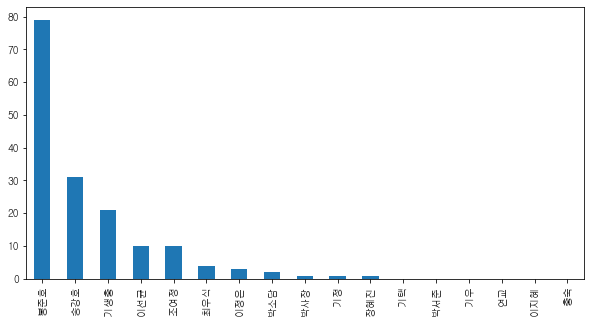

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
font_path = 'C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

tdm_freq.plot(kind='bar', figsize=(10,5))
plt.show()

3. extranoun으로 명사를 추출하여 워드클라우드를 그리고 특성을 파악하시오.

In [16]:
nouns = komoran.nouns(' '.join(review))

from collections import Counter
cnt = Counter(nouns)
temp_df = pd.DataFrame(columns=['명사', '빈도'])
freq = cnt.most_common(10)
tmp_list = []
tmp_list2 = []

for i in freq:
    tmp_list.append(i[0])
    tmp_list2.append(i[1])
    
temp_df['명사'] = tmp_list
temp_df['빈도'] = tmp_list2
temp_df

,명사,빈도
0,영화,514
1,봉준호,138
2,감독,125
3,생각,122
4,것,122
5,기대,82
6,수,82
7,기생충,78
8,연기,68
9,현실,61


In [17]:
words = {}
for i in cnt.most_common(20):
    words[i[0]] = i[1]

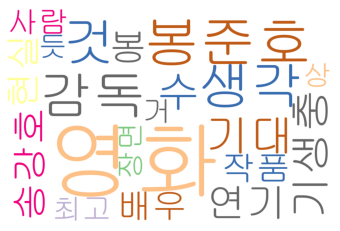

In [18]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

wordcloud = WordCloud(font_path = font_path, background_color='white', colormap='Accent_r',
                      width=1500, height=1000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()